In [2]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import roc_curve, auc

### Exploratory Data Analysis

In [3]:
heart_dataset = pd.read_csv('heart_2020_cleaned.csv')

In [4]:
heart_dataset

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [6]:
print(heart_dataset.shape)
print(heart_dataset.columns)

(319795, 18)
Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')


In [8]:
heart_dataset.drop_duplicates(inplace=True)
print(heart_dataset.shape)

(301717, 18)


### BMI

Minimum BMI: 12.02
Maximum BMI: 94.85


<AxesSubplot:xlabel='BMI', ylabel='Count'>

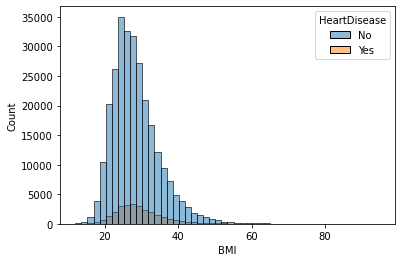

In [88]:
# Distribution of BMI and those who have heart disease
print('Minimum BMI:', heart_dataset.BMI.min())
print('Maximum BMI:', heart_dataset.BMI.max())
sns.histplot(x = 'BMI',hue = 'HeartDisease', data = heart_dataset, bins= 50)

### Smoking

<AxesSubplot:xlabel='Smoking', ylabel='count'>

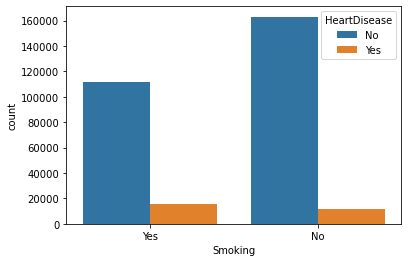

In [22]:
# Distribution of smokers and those who have heart disease
sns.countplot(x = 'Smoking',hue = 'HeartDisease', data = heart_dataset)

In [64]:
heart_dataset.loc[((heart_dataset['Smoking'] == 'Yes') & (heart_dataset['HeartDisease'] == 'Yes'))].shape[0]

15977

In [65]:
print("Total Number of Smokers:", (heart_dataset['Smoking'] == 'Yes').sum())
print("Total Number of Non-Smokers:", heart_dataset.shape[0] - (heart_dataset['Smoking'] == 'Yes').sum())
print("Total Number of Smokers that have heart disease:", heart_dataset.loc[((heart_dataset['Smoking'] == 'Yes') & (heart_dataset['HeartDisease'] == 'Yes'))].shape[0])
print("Total Number of Smokers that don't have heart disease:", heart_dataset.loc[((heart_dataset['Smoking'] == 'Yes') & (heart_dataset['HeartDisease'] == 'No'))].shape[0])
print("Total Number of Non-Smokers that have heart disease:", heart_dataset.loc[((heart_dataset['Smoking'] == 'No') & (heart_dataset['HeartDisease'] == 'Yes'))].shape[0])
print("Total Number of Non-Smokers that don't have heart disease:", heart_dataset.loc[((heart_dataset['Smoking'] == 'No') & (heart_dataset['HeartDisease'] == 'No'))].shape[0])

Total Number of Smokers: 127405
Total Number of Non-Smokers: 174312
Total Number of Smokers that have heart disease: 15977
Total Number of Smokers that don't have heart disease: 111428
Total Number of Non-Smokers that have heart disease: 11284
Total Number of Non-Smokers that don't have heart disease: 163028


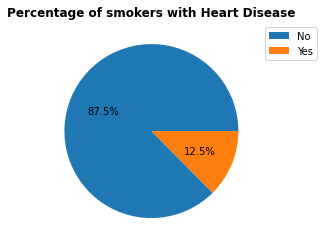

In [47]:
smoke_heart_disease = heart_dataset.loc[heart_dataset['Smoking'] == 'Yes']
plt.pie(smoke_heart_disease['HeartDisease'].value_counts(), autopct='%1.1f%%')
plt.title('Percentage of smokers with Heart Disease',weight = 'bold')
plt.legend(bbox_to_anchor=(1, 1), labels = ['No', 'Yes'])

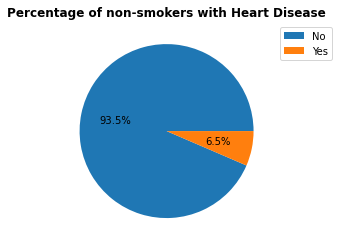

In [48]:
no_smoke_heart_disease = heart_dataset.loc[heart_dataset['Smoking'] == 'No']
plt.pie(no_smoke_heart_disease['HeartDisease'].value_counts(), autopct='%1.1f%%')
plt.title('Percentage of non-smokers with Heart Disease',weight = 'bold')
plt.legend(bbox_to_anchor=(1, 1), labels = ['No', 'Yes'])

### Alcohol Drinking

<AxesSubplot:xlabel='AlcoholDrinking', ylabel='count'>

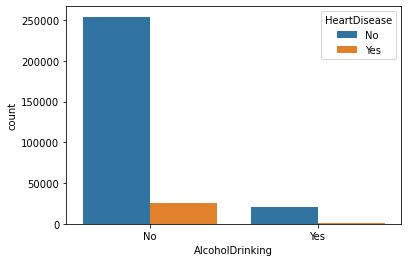

In [66]:
# Distribution of alcohol drinkers and those who have heart disease
sns.countplot(x = 'AlcoholDrinking',hue = 'HeartDisease', data = heart_dataset)

In [69]:
print("Total Number of Alcohol Drinkers:", (heart_dataset['AlcoholDrinking'] == 'Yes').sum())
print("Total Number of Alcohol Drinkers:", heart_dataset.shape[0] - (heart_dataset['AlcoholDrinking'] == 'Yes').sum())
print("Total Number of Alcohol Drinkers that have heart disease:", heart_dataset.loc[((heart_dataset['AlcoholDrinking'] == 'Yes') & (heart_dataset['HeartDisease'] == 'Yes'))].shape[0])
print("Total Number of Alcohol Drinkers that don't have heart disease:", heart_dataset.loc[((heart_dataset['AlcoholDrinking'] == 'Yes') & (heart_dataset['HeartDisease'] == 'No'))].shape[0])
print("Total Number of Non-Alcohol Drinkers that have heart disease:", heart_dataset.loc[((heart_dataset['AlcoholDrinking'] == 'No') & (heart_dataset['HeartDisease'] == 'Yes'))].shape[0])
print("Total Number of Non-Alcohol Drinkers that don't have heart disease:", heart_dataset.loc[((heart_dataset['AlcoholDrinking'] == 'No') & (heart_dataset['HeartDisease'] == 'No'))].shape[0])

Total Number of Alcohol Drinkers: 21581
Total Number of Alcohol Drinkers: 280136
Total Number of Alcohol Drinkers that have heart disease: 1141
Total Number of Alcohol Drinkers that don't have heart disease: 20440
Total Number of Non-Alcohol Drinkers that have heart disease: 26120
Total Number of Non-Alcohol Drinkers that don't have heart disease: 254016


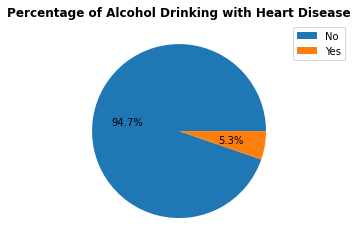

In [71]:
drink_heart_disease = heart_dataset.loc[heart_dataset['AlcoholDrinking'] == 'Yes']
plt.pie(drink_heart_disease['HeartDisease'].value_counts(), autopct='%1.1f%%')
plt.title('Percentage of Alcohol Drinking with Heart Disease',weight = 'bold')
plt.legend(bbox_to_anchor=(1, 1), labels = ['No', 'Yes'])

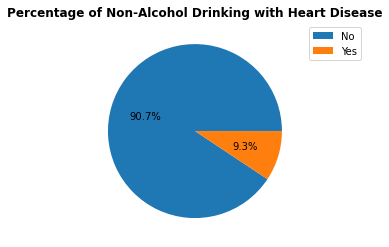

In [73]:
no_drink_heart_disease = heart_dataset.loc[heart_dataset['AlcoholDrinking'] == 'No']
plt.pie(no_drink_heart_disease['HeartDisease'].value_counts(), autopct='%1.1f%%')
plt.title('Percentage of Non-Alcohol Drinking with Heart Disease',weight = 'bold')
plt.legend(bbox_to_anchor=(1, 1), labels = ['No', 'Yes'])

### Stroke

<AxesSubplot:xlabel='Stroke', ylabel='count'>

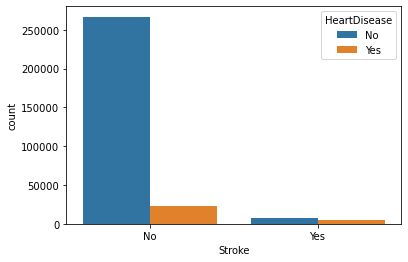

In [74]:
# Distribution of individuals with strokes and those who have heart disease
sns.countplot(x = 'Stroke',hue = 'HeartDisease', data = heart_dataset)

In [75]:
print("Total Number of Individuals that experienced a stroke:", (heart_dataset['Stroke'] == 'Yes').sum())
print("Total Number of Individuals that have not experienced a stroke:", heart_dataset.shape[0] - (heart_dataset['Stroke'] == 'Yes').sum())
print("Total Number of Individuals that experienced a stroke that have heart disease:", heart_dataset.loc[((heart_dataset['Stroke'] == 'Yes') & (heart_dataset['HeartDisease'] == 'Yes'))].shape[0])
print("Total Number of Individuals that experienced a stroke that don't have heart disease:", heart_dataset.loc[((heart_dataset['Stroke'] == 'Yes') & (heart_dataset['HeartDisease'] == 'No'))].shape[0])
print("Total Number of Individuals that have not experienced a stroke that have heart disease:", heart_dataset.loc[((heart_dataset['Stroke'] == 'No') & (heart_dataset['HeartDisease'] == 'Yes'))].shape[0])
print("Total Number of Individuals that have not experienced a stroke that don't have heart disease:", heart_dataset.loc[((heart_dataset['Stroke'] == 'No') & (heart_dataset['HeartDisease'] == 'No'))].shape[0])

Total Number of Individuals that experienced a stroke: 12064
Total Number of Individuals that have not experienced a stroke: 289653
Total Number of Individuals that experienced a stroke that have heart disease: 4389
Total Number of Individuals that experienced a stroke that don't have heart disease: 7675
Total Number of Individuals that have not experienced a stroke that have heart disease: 22872
Total Number of Individuals that have not experienced a stroke that don't have heart disease: 266781


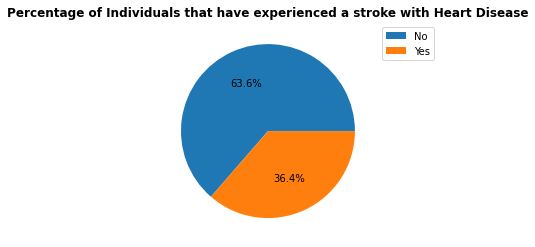

In [76]:
stroke_heart_disease = heart_dataset.loc[heart_dataset['Stroke'] == 'Yes']
plt.pie(stroke_heart_disease['HeartDisease'].value_counts(), autopct='%1.1f%%')
plt.title('Percentage of Individuals that have experienced a stroke with Heart Disease',weight = 'bold')
plt.legend(bbox_to_anchor=(1, 1), labels = ['No', 'Yes'])

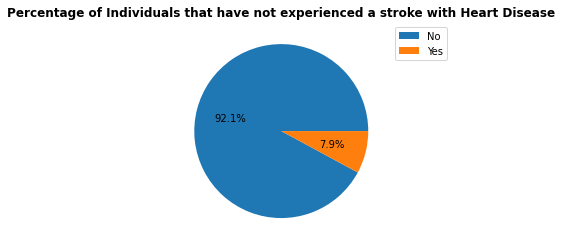

In [78]:
nostroke_heart_disease = heart_dataset.loc[heart_dataset['Stroke'] == 'No']
plt.pie(nostroke_heart_disease['HeartDisease'].value_counts(), autopct='%1.1f%%')
plt.title('Percentage of Individuals that have not experienced a stroke with Heart Disease',weight = 'bold')
plt.legend(bbox_to_anchor=(1, 1), labels = ['No', 'Yes'])

### Physical Health

Minimum days of physical activity in the past 30 days: 0.0
Maximum days of physical activity in the past 30 days: 30.0


<AxesSubplot:xlabel='PhysicalHealth', ylabel='Count'>

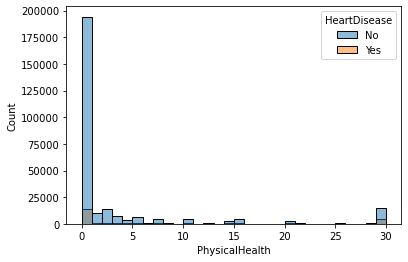

In [87]:
# Distribution of Physical Health and those who have heart disease
print('Minimum days of physical activity in the past 30 days:', heart_dataset.PhysicalHealth.min())
print('Maximum days of physical activity in the past 30 days:', heart_dataset.PhysicalHealth.max())
sns.histplot(x = 'PhysicalHealth', hue = 'HeartDisease', data = heart_dataset, bins= 30)

### Mental Health

Minimum days where mental health of individaul was not good in the past 30 days: 0.0
Maximum days where mental health of individaul was not good in the past 30 days: 30.0


<AxesSubplot:xlabel='MentalHealth', ylabel='Count'>

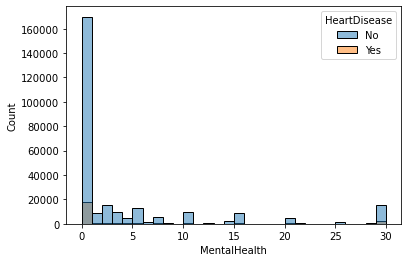

In [89]:
# Distribution of Mental Health and those who have heart disease
print('Minimum days where mental health of individaul was not good in the past 30 days:', heart_dataset.MentalHealth.min())
print('Maximum days where mental health of individaul was not good in the past 30 days:', heart_dataset.MentalHealth.max())
sns.histplot(x = 'MentalHealth', hue = 'HeartDisease', data = heart_dataset, bins= 30)

### Difficulty Walking or Climbing Stairs

<AxesSubplot:xlabel='DiffWalking', ylabel='count'>

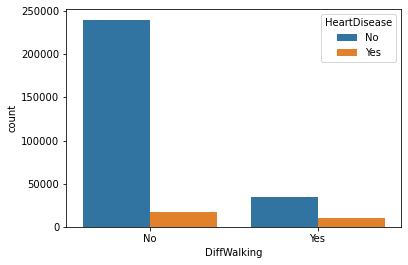

In [91]:
# Distribution of those having difficulting walking or climbing stairs and those who have heart disease
sns.countplot(x = 'DiffWalking',hue = 'HeartDisease', data = heart_dataset)

In [92]:
print("Total Number of Individuals that have difficulty walking/climbing stairs:", (heart_dataset['DiffWalking'] == 'Yes').sum())
print("Total Number of Individuals that don't have difficulty walking/climbing stairs:", heart_dataset.shape[0] - (heart_dataset['DiffWalking'] == 'Yes').sum())
print("Total Number of Individuals that have difficulty walking/climbing stairs that have heart disease:", heart_dataset.loc[((heart_dataset['DiffWalking'] == 'Yes') & (heart_dataset['HeartDisease'] == 'Yes'))].shape[0])
print("Total Number of Individuals that have difficulty walking/climbing stairs that don't have heart disease:", heart_dataset.loc[((heart_dataset['DiffWalking'] == 'Yes') & (heart_dataset['HeartDisease'] == 'No'))].shape[0])
print("Total Number of Individuals that don't have difficulty walking/climbing stairs that have heart disease:", heart_dataset.loc[((heart_dataset['DiffWalking'] == 'No') & (heart_dataset['HeartDisease'] == 'Yes'))].shape[0])
print("Total Number of Individuals that don't have difficulty walking/climbing stairs that don't have heart disease:", heart_dataset.loc[((heart_dataset['DiffWalking'] == 'No') & (heart_dataset['HeartDisease'] == 'No'))].shape[0])

Total Number of Individuals that have difficulty walking/climbing stairs: 44355
Total Number of Individuals that don't have difficulty walking/climbing stairs: 257362
Total Number of Individuals that have difficulty walking/climbing stairs that have heart disease: 10024
Total Number of Individuals that have difficulty walking/climbing stairs that don't have heart disease: 34331
Total Number of Individuals that don't have difficulty walking/climbing stairs that have heart disease: 17237
Total Number of Individuals that don't have difficulty walking/climbing stairs that don't have heart disease: 240125


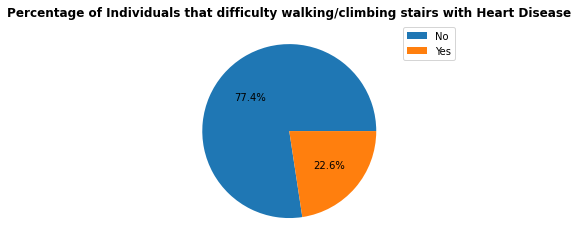

In [93]:
diffwalking_heart_disease = heart_dataset.loc[heart_dataset['DiffWalking'] == 'Yes']
plt.pie(diffwalking_heart_disease['HeartDisease'].value_counts(), autopct='%1.1f%%')
plt.title('Percentage of Individuals that difficulty walking/climbing stairs with Heart Disease',weight = 'bold')
plt.legend(bbox_to_anchor=(1, 1), labels = ['No', 'Yes'])

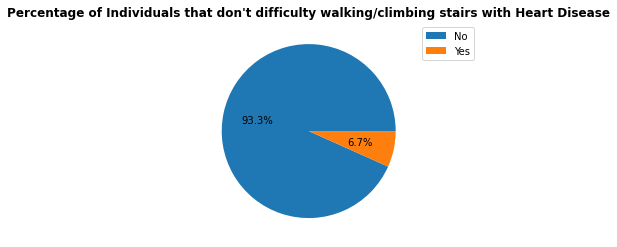

In [96]:
no_diffwalking_heart_disease = heart_dataset.loc[heart_dataset['DiffWalking'] == 'No']
plt.pie(no_diffwalking_heart_disease['HeartDisease'].value_counts(), autopct='%1.1f%%')
plt.title("Percentage of Individuals that don't difficulty walking/climbing stairs with Heart Disease",weight = 'bold')
plt.legend(bbox_to_anchor=(1, 1), labels = ['No', 'Yes'])

### Sex

<AxesSubplot:xlabel='Sex', ylabel='count'>

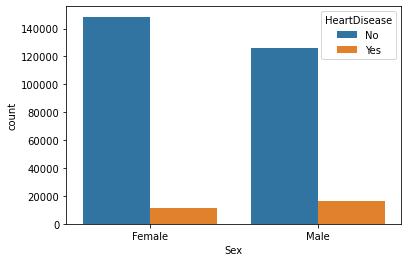

In [98]:
# Distribution of sex and those who have heart disease
sns.countplot(x = 'Sex',hue = 'HeartDisease', data = heart_dataset)

In [101]:
print("Total Number of Males:", (heart_dataset['Sex'] == 'Male').sum())
print("Total Number of Females:", heart_dataset.shape[0] - (heart_dataset['Sex'] == 'Male').sum())
print("Total Number of Males that have heart disease:", heart_dataset.loc[((heart_dataset['Sex'] == 'Male') & (heart_dataset['HeartDisease'] == 'Yes'))].shape[0])
print("Total Number of Males that don't have heart disease:", heart_dataset.loc[((heart_dataset['Sex'] == 'Male') & (heart_dataset['HeartDisease'] == 'No'))].shape[0])
print("Total Number of Females that have heart disease:", heart_dataset.loc[((heart_dataset['Sex'] == 'Female') & (heart_dataset['HeartDisease'] == 'Yes'))].shape[0])
print("Total Number of Females that don't have heart disease:", heart_dataset.loc[((heart_dataset['Sex'] == 'Female') & (heart_dataset['HeartDisease'] == 'No'))].shape[0])

Total Number of Males: 142046
Total Number of Females: 159671
Total Number of Males that have heart disease: 16048
Total Number of Males that don't have heart disease: 125998
Total Number of Females that have heart disease: 11213
Total Number of Females that don't have heart disease: 148458


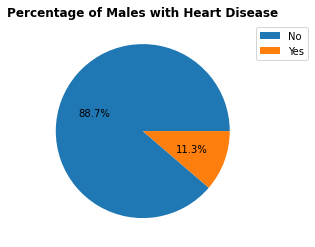

In [102]:
male_heart_disease = heart_dataset.loc[heart_dataset['Sex'] == 'Male']
plt.pie(male_heart_disease['HeartDisease'].value_counts(), autopct='%1.1f%%')
plt.title('Percentage of Males with Heart Disease',weight = 'bold')
plt.legend(bbox_to_anchor=(1, 1), labels = ['No', 'Yes'])

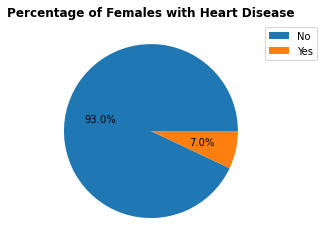

In [103]:
female_heart_disease = heart_dataset.loc[heart_dataset['Sex'] == 'Female']
plt.pie(female_heart_disease['HeartDisease'].value_counts(), autopct='%1.1f%%')
plt.title('Percentage of Females with Heart Disease',weight = 'bold')
plt.legend(bbox_to_anchor=(1, 1), labels = ['No', 'Yes'])

### Age 

In [132]:
print("Minimum Age:", heart_dataset.AgeCategory.min())
print("Maximum Age:", heart_dataset.AgeCategory.max())

Minimum Age: 18-24
Maximum Age: 80 or older


<AxesSubplot:xlabel='AgeCategory', ylabel='count'>

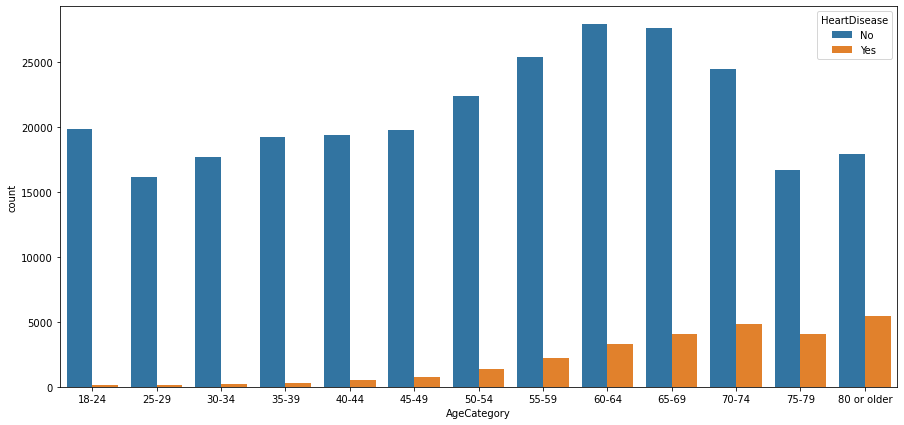

In [138]:
# Distribution of Age Groups and those who have heart disease
plt.figure(figsize=(15,7))
age_order = ['18-24', '25-29', '30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-74','75-79','80 or older']
sns.countplot(x = 'AgeCategory', hue = 'HeartDisease', data = heart_dataset, order = age_order)

### Race

<AxesSubplot:xlabel='Race', ylabel='count'>

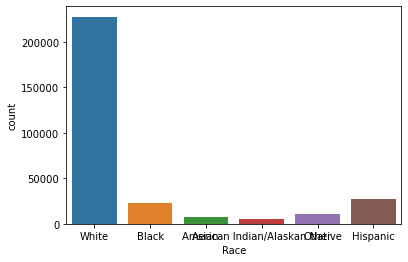

In [140]:
sns.countplot(x = 'Race', data = heart_dataset)

<AxesSubplot:xlabel='Race', ylabel='count'>

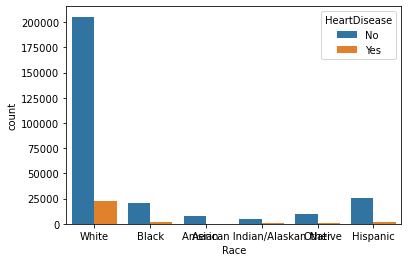

In [142]:
sns.countplot(x = 'Race', hue = 'HeartDisease', data = heart_dataset)

Comment: Just based on EDA, Race is probably one of the predictor that won't have an effect on our developed model. 

### Diabetic

<AxesSubplot:xlabel='Diabetic', ylabel='count'>

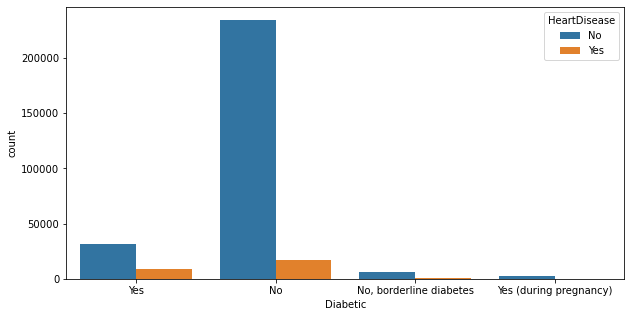

In [147]:
# Distribution of diabetics and those who have heart disease
plt.figure(figsize=(10,5))
sns.countplot(x = 'Diabetic',hue = 'HeartDisease', data = heart_dataset)

### Physical Activity

<AxesSubplot:xlabel='PhysicalActivity', ylabel='count'>

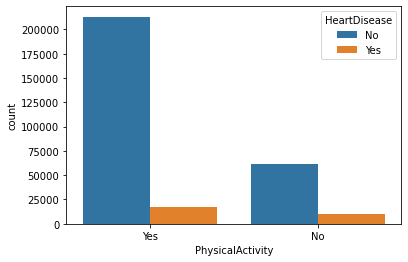

In [148]:
# Distribution of those involved in physical activity and those who have heart disease
sns.countplot(x = 'PhysicalActivity',hue = 'HeartDisease', data = heart_dataset)

In [149]:
print("Total Number of Individuals are involved in Physical Activity:", (heart_dataset['PhysicalActivity'] == 'Yes').sum())
print("Total Number of Individuals are involved in Physical Activity:", heart_dataset.shape[0] - (heart_dataset['PhysicalActivity'] == 'Yes').sum())
print("Total Number of Individuals are involved in Physical Activity that have heart disease:", heart_dataset.loc[((heart_dataset['PhysicalActivity'] == 'Yes') & (heart_dataset['HeartDisease'] == 'Yes'))].shape[0])
print("Total Number of Individuals are involved in Physical Activity that don't have heart disease:", heart_dataset.loc[((heart_dataset['PhysicalActivity'] == 'Yes') & (heart_dataset['HeartDisease'] == 'No'))].shape[0])
print("Total Number of Individuals are not involved in Physical Activity that have heart disease:", heart_dataset.loc[((heart_dataset['PhysicalActivity'] == 'No') & (heart_dataset['HeartDisease'] == 'Yes'))].shape[0])
print("Total Number of Individuals are not involved in Physical Activity that don't have heart disease:", heart_dataset.loc[((heart_dataset['PhysicalActivity'] == 'No') & (heart_dataset['HeartDisease'] == 'No'))].shape[0])

Total Number of Individuals are involved in Physical Activity: 230412
Total Number of Individuals are involved in Physical Activity: 71305
Total Number of Individuals are involved in Physical Activity that have heart disease: 17379
Total Number of Individuals are involved in Physical Activity that don't have heart disease: 213033
Total Number of Individuals are not involved in Physical Activity that have heart disease: 9882
Total Number of Individuals are not involved in Physical Activity that don't have heart disease: 61423


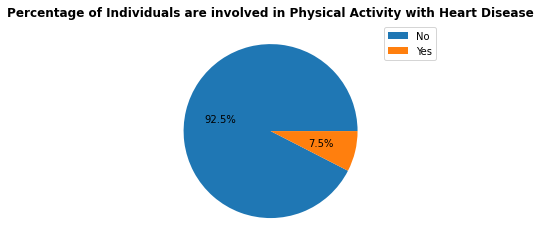

In [151]:
physact_heart_disease = heart_dataset.loc[heart_dataset['PhysicalActivity'] == 'Yes']
plt.pie(physact_heart_disease['HeartDisease'].value_counts(), autopct='%1.1f%%')
plt.title('Percentage of Individuals are involved in Physical Activity with Heart Disease',weight = 'bold')
plt.legend(bbox_to_anchor=(1, 1), labels = ['No', 'Yes'])

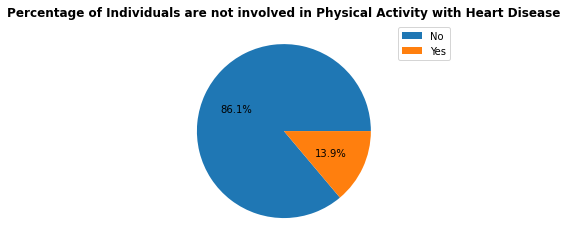

In [152]:
no_physact_heart_disease = heart_dataset.loc[heart_dataset['PhysicalActivity'] == 'No']
plt.pie(no_physact_heart_disease['HeartDisease'].value_counts(), autopct='%1.1f%%')
plt.title('Percentage of Individuals are not involved in Physical Activity with Heart Disease',weight = 'bold')
plt.legend(bbox_to_anchor=(1, 1), labels = ['No', 'Yes'])

### General Health

<AxesSubplot:xlabel='GenHealth', ylabel='count'>

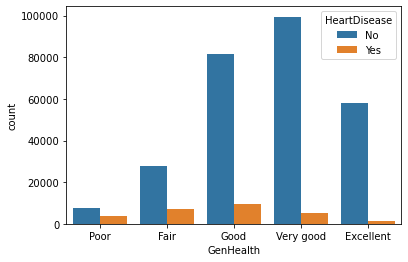

In [154]:
# Distribution of General Health and those who have heart disease
genhealth_order = ['Poor', 'Fair', 'Good', 'Very good', 'Excellent']
sns.countplot(x = 'GenHealth', hue = 'HeartDisease', data = heart_dataset, order = genhealth_order)

Comment: I think this is interesting. I would have expected this to be pretty right-skewed for those with heart disease, but it looks somewhat binomial. It makes sense to me that it is left skewed for those that don't have heart disease since better general health would probably indicate lower chances of heart disease.

### Sleep Time

In [157]:
print("Minimum Sleep Time:", heart_dataset.SleepTime.min())
print("Maximum Sleep Time:", heart_dataset.SleepTime.max())

Minimum Sleep Time: 1.0
Maximum Sleep Time: 24.0


<AxesSubplot:xlabel='SleepTime', ylabel='count'>

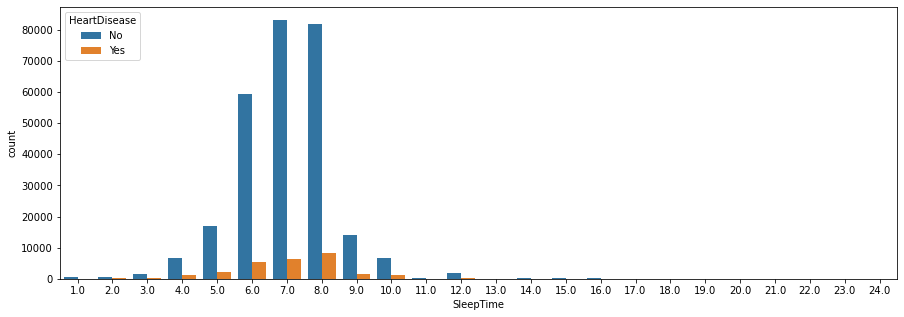

In [161]:
plt.figure(figsize = (15, 5))
sns.countplot(x = 'SleepTime',hue = 'HeartDisease', data = heart_dataset)

Comment 1 : It might be useful to group values of sleep time <3 or <4 together and >11 or >12 together.<br>
Comment 2: Interesting to see how Number of individuals with heart disease increases as sleep time increases between 4-8 hours of sleep

In [196]:
### Adjustments to graph based on Comment 2

In [193]:
SleepTime_dataset = heart_dataset.copy()
SleepTime_dataset['SleepTime'] = SleepTime_dataset.apply(lambda x: 11 if x.SleepTime > 11 else x.SleepTime, axis = 1)
SleepTime_dataset['SleepTime'] = SleepTime_dataset.apply(lambda x: 4 if x.SleepTime < 4 else x.SleepTime, axis = 1)

In [194]:
SleepTime_dataset.SleepTime.value_counts()

8.0     90202
7.0     89445
6.0     64655
5.0     19101
9.0     15853
4.0     11061
10.0     7782
11.0     3618
Name: SleepTime, dtype: int64

<AxesSubplot:xlabel='SleepTime', ylabel='count'>

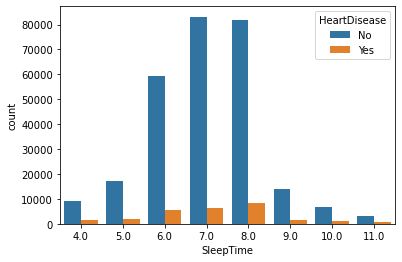

In [195]:
sns.countplot(x = 'SleepTime',hue = 'HeartDisease', data = SleepTime_dataset)

### Asthma

<AxesSubplot:xlabel='Asthma', ylabel='count'>

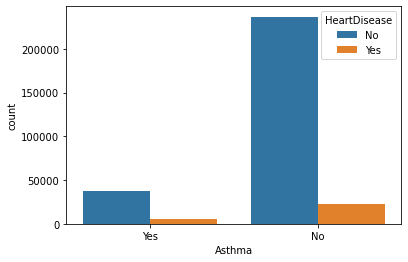

In [162]:
# Distribution of Individuals with Asthma and those who have heart disease
sns.countplot(x = 'Asthma',hue = 'HeartDisease', data = heart_dataset)

In [163]:
print("Total Number of Individuals with Asthma:", (heart_dataset['Asthma'] == 'Yes').sum())
print("Total Number of Individuals without Asthma:", heart_dataset.shape[0] - (heart_dataset['Asthma'] == 'Yes').sum())
print("Total Number of Individuals with Asthma that have heart disease:", heart_dataset.loc[((heart_dataset['Asthma'] == 'Yes') & (heart_dataset['HeartDisease'] == 'Yes'))].shape[0])
print("Total Number of Individuals with Asthma that don't have heart disease:", heart_dataset.loc[((heart_dataset['Asthma'] == 'Yes') & (heart_dataset['HeartDisease'] == 'No'))].shape[0])
print("Total Number of Individuals without Asthma that have heart disease:", heart_dataset.loc[((heart_dataset['Asthma'] == 'No') & (heart_dataset['HeartDisease'] == 'Yes'))].shape[0])
print("Total Number of Individuals without Asthma that don't have heart disease:", heart_dataset.loc[((heart_dataset['Asthma'] == 'No') & (heart_dataset['HeartDisease'] == 'No'))].shape[0])

Total Number of Individuals with Asthma: 42651
Total Number of Individuals without Asthma: 259066
Total Number of Individuals with Asthma that have heart disease: 4932
Total Number of Individuals with Asthma that don't have heart disease: 37719
Total Number of Individuals without Asthma that have heart disease: 22329
Total Number of Individuals without Asthma that don't have heart disease: 236737


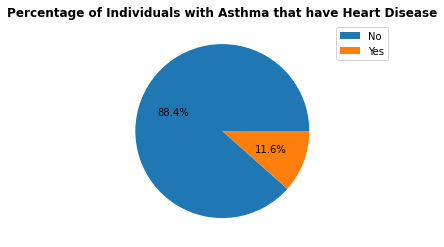

In [164]:
asthma_heart_disease = heart_dataset.loc[heart_dataset['Asthma'] == 'Yes']
plt.pie(asthma_heart_disease['HeartDisease'].value_counts(), autopct='%1.1f%%')
plt.title('Percentage of Individuals with Asthma that have Heart Disease',weight = 'bold')
plt.legend(bbox_to_anchor=(1, 1), labels = ['No', 'Yes'])

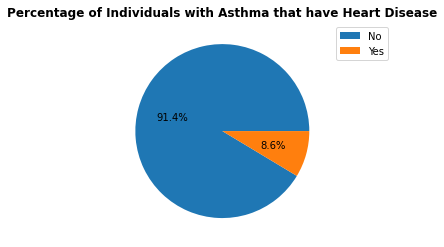

In [165]:
no_asthma_heart_disease = heart_dataset.loc[heart_dataset['Asthma'] == 'No']
plt.pie(no_asthma_heart_disease['HeartDisease'].value_counts(), autopct='%1.1f%%')
plt.title('Percentage of Individuals with Asthma that have Heart Disease',weight = 'bold')
plt.legend(bbox_to_anchor=(1, 1), labels = ['No', 'Yes'])

### Kidney Disease

<AxesSubplot:xlabel='KidneyDisease', ylabel='count'>

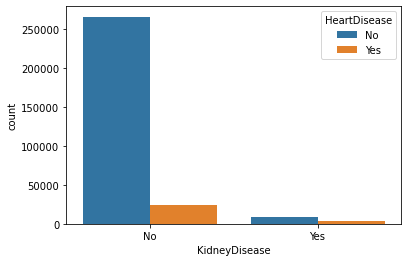

In [167]:
# Distribution of Individuals with Kidney and those who have heart disease
sns.countplot(x = 'KidneyDisease',hue = 'HeartDisease', data = heart_dataset)

In [168]:
print("Total Number of Individuals with Kidney Disease:", (heart_dataset['KidneyDisease'] == 'Yes').sum())
print("Total Number of Individuals without Kidney Disease:", heart_dataset.shape[0] - (heart_dataset['KidneyDisease'] == 'Yes').sum())
print("Total Number of Individuals with Kidney Disease that have heart disease:", heart_dataset.loc[((heart_dataset['KidneyDisease'] == 'Yes') & (heart_dataset['HeartDisease'] == 'Yes'))].shape[0])
print("Total Number of Individuals with Kidney Disease that don't have heart disease:", heart_dataset.loc[((heart_dataset['KidneyDisease'] == 'Yes') & (heart_dataset['HeartDisease'] == 'No'))].shape[0])
print("Total Number of Individuals without Kidney Disease that have heart disease:", heart_dataset.loc[((heart_dataset['KidneyDisease'] == 'No') & (heart_dataset['HeartDisease'] == 'Yes'))].shape[0])
print("Total Number of Individuals without Kidney Disease that don't have heart disease:", heart_dataset.loc[((heart_dataset['KidneyDisease'] == 'No') & (heart_dataset['HeartDisease'] == 'No'))].shape[0])

Total Number of Individuals with Kidney Disease: 11776
Total Number of Individuals without Kidney Disease: 289941
Total Number of Individuals with Kidney Disease that have heart disease: 3454
Total Number of Individuals with Kidney Disease that don't have heart disease: 8322
Total Number of Individuals without Kidney Disease that have heart disease: 23807
Total Number of Individuals without Kidney Disease that don't have heart disease: 266134


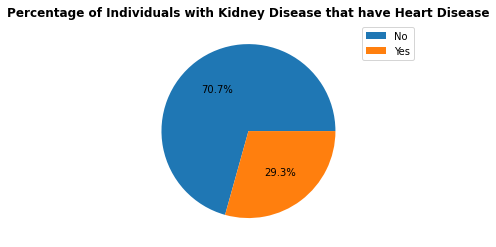

In [169]:
kidney_disease_heart_disease = heart_dataset.loc[heart_dataset['KidneyDisease'] == 'Yes']
plt.pie(kidney_disease_heart_disease['HeartDisease'].value_counts(), autopct='%1.1f%%')
plt.title('Percentage of Individuals with Kidney Disease that have Heart Disease',weight = 'bold')
plt.legend(bbox_to_anchor=(1, 1), labels = ['No', 'Yes'])

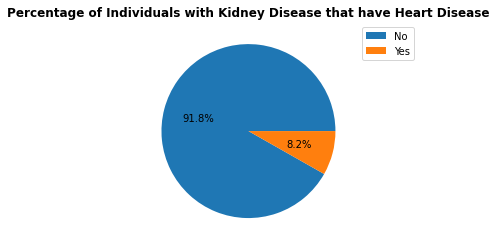

In [170]:
no_kidney_disease_heart_disease = heart_dataset.loc[heart_dataset['KidneyDisease'] == 'No']
plt.pie(no_kidney_disease_heart_disease['HeartDisease'].value_counts(), autopct='%1.1f%%')
plt.title('Percentage of Individuals with Kidney Disease that have Heart Disease',weight = 'bold')
plt.legend(bbox_to_anchor=(1, 1), labels = ['No', 'Yes'])

Comment: Potential to be a good predictor. 

### Skin Cancer

<AxesSubplot:xlabel='SkinCancer', ylabel='count'>

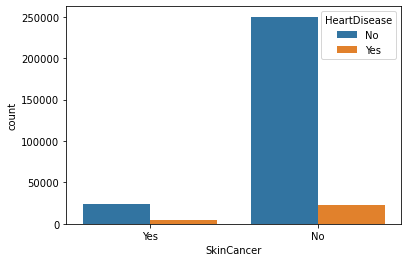

In [171]:
# Distribution of Individuals with Skin Cancer and those who have heart disease
sns.countplot(x = 'SkinCancer',hue = 'HeartDisease', data = heart_dataset)

In [172]:
print("Total Number of Individuals with Skin Cancer:", (heart_dataset['SkinCancer'] == 'Yes').sum())
print("Total Number of Individuals without Skin Cancer:", heart_dataset.shape[0] - (heart_dataset['SkinCancer'] == 'Yes').sum())
print("Total Number of Individuals with Skin Cancer that have heart disease:", heart_dataset.loc[((heart_dataset['SkinCancer'] == 'Yes') & (heart_dataset['HeartDisease'] == 'Yes'))].shape[0])
print("Total Number of Individuals with Skin Cancer that don't have heart disease:", heart_dataset.loc[((heart_dataset['SkinCancer'] == 'Yes') & (heart_dataset['HeartDisease'] == 'No'))].shape[0])
print("Total Number of Individuals without Skin Cancer that have heart disease:", heart_dataset.loc[((heart_dataset['SkinCancer'] == 'No') & (heart_dataset['HeartDisease'] == 'Yes'))].shape[0])
print("Total Number of Individuals without Skin Cancer that don't have heart disease:", heart_dataset.loc[((heart_dataset['SkinCancer'] == 'No') & (heart_dataset['HeartDisease'] == 'No'))].shape[0])

Total Number of Individuals with Skin Cancer: 29292
Total Number of Individuals without Skin Cancer: 272425
Total Number of Individuals with Skin Cancer that have heart disease: 4968
Total Number of Individuals with Skin Cancer that don't have heart disease: 24324
Total Number of Individuals without Skin Cancer that have heart disease: 22293
Total Number of Individuals without Skin Cancer that don't have heart disease: 250132


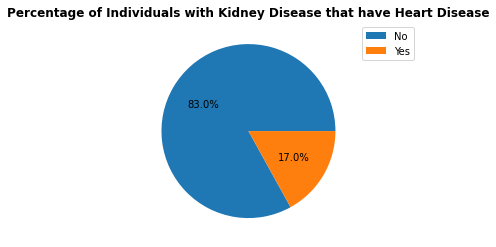

In [173]:
skin_cancer_heart_disease = heart_dataset.loc[heart_dataset['SkinCancer'] == 'Yes']
plt.pie(skin_cancer_heart_disease['HeartDisease'].value_counts(), autopct='%1.1f%%')
plt.title('Percentage of Individuals with Kidney Disease that have Heart Disease',weight = 'bold')
plt.legend(bbox_to_anchor=(1, 1), labels = ['No', 'Yes'])

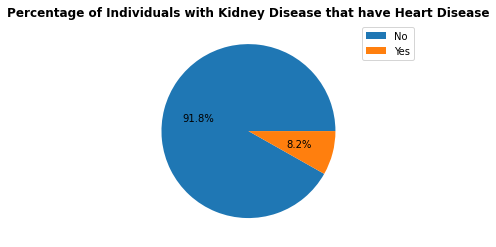

In [174]:
no_skin_cancer_heart_disease = heart_dataset.loc[heart_dataset['SkinCancer'] == 'No']
plt.pie(no_skin_cancer_heart_disease['HeartDisease'].value_counts(), autopct='%1.1f%%')
plt.title('Percentage of Individuals with Kidney Disease that have Heart Disease',weight = 'bold')
plt.legend(bbox_to_anchor=(1, 1), labels = ['No', 'Yes'])

<br>
<br>
<br>

### Conclusions
<br>
<br>
<br>